In [1]:
import torch
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.dataset import Dataset

In [2]:
input_size = 28
num_classes = 10
num_epochs =3
batch_size = 64

transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)


In [3]:
#构造batch数据
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)

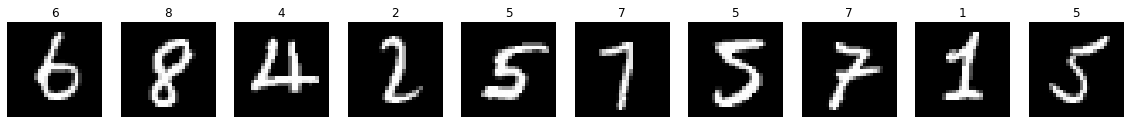

In [109]:
import matplotlib.pyplot as plt

def show(nums):
    plt.figure(figsize=(20*nums/10, 4*nums/10))
    for i in range(nums):
        num = np.random.randint(0,10000)
        img = train_dataset[num][0].numpy()
        img = img.transpose(1,2,0)
        
        plt.subplot(int(nums/10),10,i+1)
        plt.axis('off')
        plt.imshow(img,cmap='gray')
        plt.title(train_dataset[num][1])      
show(10)   


# 构建卷积网络
卷积结果计算公式：（H/W-C+2P）/S + 1

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(
                in_channels = 1,    #输入为（1，28，28）
                out_channels = 16,  #输出为16个特征图
                kernel_size = 5,
                stride = 1,
                padding = 2,),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2))
        self.conv2 = nn.Sequential(nn.Conv2d(
                in_channels = 16,    #输入为（16，14，14）
                out_channels = 32,  #输出为32个特征图
                kernel_size = 5,
                stride = 1,
                padding = 2,),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2))#输出为（32，7，7）
        self.out = nn.Linear(32*7*7, 10)
    
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output
        
        
    

In [5]:
def acc(pre, labels):
    pred = torch.max(pre.data,1)[1] #返回最大值和索引
    rights = pred.eq(labels.data.view_as(pred)).sum()
    return rights, len(labels)

In [127]:
x = torch.tensor([[[1, 2], [3, 4]]])
y = torch.tensor([[1, 1, 3, 3]])
out = torch.eq(x.view_as(y), y)
print(x.data)
print(y)
print(out)


tensor([[[1, 2],
         [3, 4]]])
tensor([[1, 1, 3, 3]])
tensor([[ True, False,  True, False]])


In [7]:
net = CNN()
#
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), lr=0.001)
batch_size = 64
for epoch in range(num_epochs):
    train_rights = []
    
    for batch_idx, (data, target) in enumerate(train_loader):
        net.train()
        output = net(data)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        right = acc(output, target)
        train_rights.append(right)
        
        if batch_idx % 100 == 0:
            net.eval()
            val_rights = []
            
            for (data, taget) in test_loader:
                ouput = net(data)
                right = acc(output ,target)
                val_rights.append(right)
            
            train_r = (sum([tup[0] for tup in train_rights]), sum([tup[1] for tup in train_rights]))
            val_r = (sum([tup[0] for tup in val_rights]), sum([tup[1] for tup in val_rights]))
            print('epoch:{}[{}/{} ({:.0f}%)]\t loss: {:.6f}\t train_acc:{:.2f}%\t val_acc: {:.2f}%'.format(
            epoch, batch_idx, len(train_loader.dataset),
            100. * batch_idx / len(train_loader),
            loss.data,
            100. * train_r[0].numpy() / train_r[1],
            100. * val_r[0].numpy() / val_r[1]))

epoch:0[0/60000 (0%)]	 loss: 2.317341	 train_acc:14.06%	 val_acc: 14.06%
epoch:0[6400/60000 (11%)]	 loss: 0.462221	 train_acc:77.01%	 val_acc: 85.94%
epoch:0[12800/60000 (21%)]	 loss: 0.111143	 train_acc:84.93%	 val_acc: 98.44%
epoch:0[19200/60000 (32%)]	 loss: 0.111976	 train_acc:88.35%	 val_acc: 93.75%
epoch:0[25600/60000 (43%)]	 loss: 0.122826	 train_acc:90.36%	 val_acc: 96.88%
epoch:0[32000/60000 (53%)]	 loss: 0.090978	 train_acc:91.72%	 val_acc: 95.31%
epoch:0[38400/60000 (64%)]	 loss: 0.077593	 train_acc:92.65%	 val_acc: 98.44%
epoch:0[44800/60000 (75%)]	 loss: 0.099151	 train_acc:93.35%	 val_acc: 98.44%
epoch:0[51200/60000 (85%)]	 loss: 0.083084	 train_acc:93.86%	 val_acc: 98.44%
epoch:0[57600/60000 (96%)]	 loss: 0.006684	 train_acc:94.28%	 val_acc: 100.00%
epoch:1[0/60000 (0%)]	 loss: 0.179944	 train_acc:93.75%	 val_acc: 93.75%
epoch:1[6400/60000 (11%)]	 loss: 0.026606	 train_acc:97.96%	 val_acc: 100.00%
epoch:1[12800/60000 (21%)]	 loss: 0.058522	 train_acc:98.10%	 val_acc: 96.